In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
     PolynomialFeatures, KBinsDiscretizer
)
import pandas as pd


In [2]:
data=pd.read_csv('Train.csv')
data2=pd.read_csv('data2.csv')

In [3]:
poly = PolynomialFeatures(degree=2,interaction_only= True)
p = poly.fit_transform(data[['Cost_of_the_Product','Discount_offered']])
print("polynomial Features:", poly.get_feature_names_out(['Cost_of_the_Product','Discount_offered']))

polynomial Features: ['1' 'Cost_of_the_Product' 'Discount_offered'
 'Cost_of_the_Product Discount_offered']


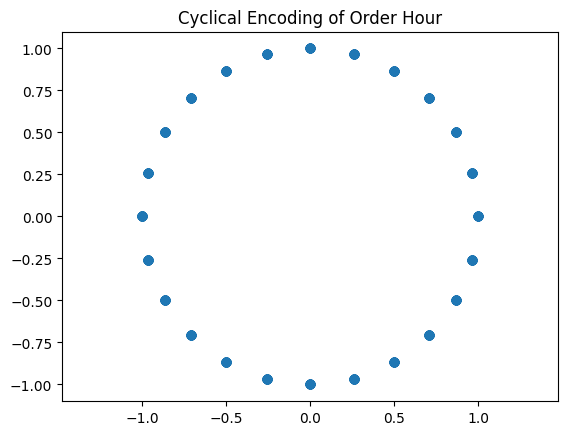

In [4]:
def cyclical_encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data.drop(col, axis=1)

cyclic = cyclical_encode(data2[['Order_Hour']].copy(), 'Order_Hour', 24)
plt.scatter(cyclic['Order_Hour_sin'], cyclic['Order_Hour_cos'])
plt.title("Cyclical Encoding of Order Hour")
plt.axis('equal')
plt.show()

In [5]:
kbin = KBinsDiscretizer(n_bins = 3, encode='onehot',strategy = 'kmeans')
fill = data[['Weight_in_gms']].fillna(data['Weight_in_gms'].mean())
bin = kbin.fit_transform(fill)
print("Binned Weight Examples:", bin[:5].toarray().flatten())

Binned Weight Examples: [0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
